# Spektrogramm für Multischichtsysteme
Autor: M. Seiberlich

Das jupyter notebook enthält Simulationen, die ich für meine Masterarbeit erstellt habe. Sie verwenden das exzellente Pythonmodul [tmm](https://pypi.org/project/tmm/). Die daten wurden experimentell bestimmt. Details zum theoretischen Hintergrund und zu den Messmethoden können in meiner Masterarbeit nachgelesen werden [1].


# Referenzen
[1] Seiberlich, M. Ultradünne dielektrische Elastomeraktuatoren für optische Anwendungen. Universitätsbibliothek Heidelberg (2017).

## Lizenz
Die Inhalte dieses Repositories sind unter der Creative Commons Lizenz mit Namensnennung 4.0 International (CC-BY 4.0) lizenziert https://creativecommons.org/licenses/by/4.0/deed.de

In [1]:
import os
import glob
import numpy as np
import pandas as pd
from pathlib import Path

from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

from tmm import *

# "5 * degree" is 5 degrees expressed in radians
# "1.2 / degree" is 1.2 radians expressed in degrees
degree = np.pi/180

# os agnostic way to handle path
data_path = Path("data")
calc_path = Path("calculations")
plots_path = Path("plots")

In [2]:
# Number of repetition in
n = 6
# Material data made up
n_siliconeH = 1.65
d_siliconeH = 450 / 4 /n_siliconeH  # nm

n_siliconeL = 1.43
d_siliconeL = 450 / 4 /n_siliconeL # nm

# Read in real data
nkPEDOT = np.loadtxt(data_path / "Ellipso_PET_ITO_PEDOT(Inkjet)6_mitIm_nk.txt", comments=";")
d_PEDOT_PSS = 20 # nm

shape = nkPEDOT.shape[0]

# Unitcell
n_unit = np.zeros((shape, 3), dtype="complex128")
n_unit[:,0] = np.full((shape), n_siliconeH)
n_unit[:,1] = np.full((shape), n_siliconeL)
n_unit[:,2] = nkPEDOT[:,1] + nkPEDOT[:,2]*1j

d_unit = np.array([d_siliconeH,d_siliconeL,d_PEDOT_PSS])

# Stack
n_list = np.zeros((shape, 3*n + 2), dtype="complex128")
d_list = np.zeros(3*n + 2)

# First medium is air
n_list[:,0] = np.full((shape), 1, dtype="complex128")
d_list[0] = np.inf

# Substrate medium is glass
n_list[:,-1] = np.full((shape), 1.52, dtype="complex128")
d_list[-1] = np.array([np.inf])

# Periodic layers (between air and substrate)
for i in range(1, 3*n, 3):
    n_list[:,i:i+3] = n_unit
    d_list[i:i+3] = d_unit
    
d_siliconeH, d_siliconeL

(68.18181818181819, 78.67132867132868)

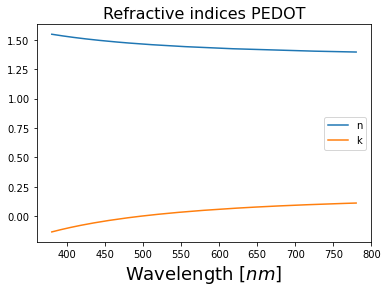

In [3]:
plt.figure()
plt.plot(nkPEDOT[:,0],nkPEDOT[:,1], label="n")
plt.plot(nkPEDOT[:,0],nkPEDOT[:,2], label="k")
plt.xlabel('Wavelength [$nm$]', size=18)
plt.title('Refractive indices PEDOT', size=16)
plt.legend(loc="best")
#plt.savefig(plots_path / "Refractive indices PEDOT" + ".svg", format="svg")
plt.show()

Number of layers: 6
dH = 68.18181818181819[nm]
dL = 78.67132867132868[nm]


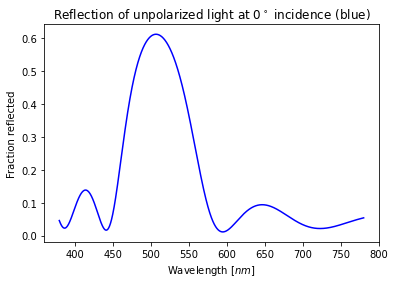

In [4]:
# Calculate Reflectance for unpolarized light with tmm module
# Angle of reflectance th
th = 0

# initialize lists of y-values to plot
R = []
for i in range(shape):
    # I arbitrarily decided to use 's'.
    R.append(unpolarized_RT(n_list[i], d_list, th*degree, nkPEDOT[i,0])['R'])

R = np.array(R)


# Plot
print("Number of layers: " + str(n))
print("dH = " + str(d_siliconeH) + "[nm]")
print("dL = " + str(d_siliconeL) + "[nm]")
plt.figure()
plt.plot(nkPEDOT[:,0],R,'blue')
plt.xlabel('Wavelength [$nm$]')
plt.ylabel('Fraction reflected')
plt.title('Reflection of unpolarized light at 0$^\circ$ incidence (blue)')
#plt.savefig(plots_path / "Reflection of unpolarized light at 0 degree incidence_8doubleLayers" + ".svg", format="svg")
plt.show()

In [5]:
# Calculate Reflectance for unpolarized light with tmm module
# Angle of reflectance th
th0 = 0
th1 = 45

# initialize lists of y-values to plot
R0 = []
R1 =[]
for i in range(shape):
    # I arbitrarily decided to use 's'.
    R0.append(unpolarized_RT(n_list[i], d_list, th0*degree, nkPEDOT[i,0])['R'])
    R1.append(unpolarized_RT(n_list[i], d_list, th1*degree, nkPEDOT[i,0])['R'])

R0 = np.array(R0)
R1 = np.array(R1)

Number of layers: 6


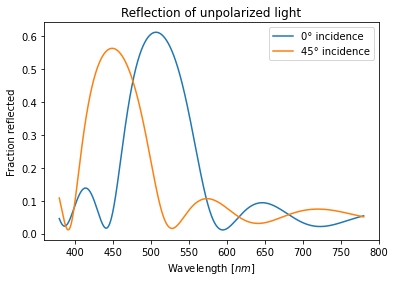

In [6]:
# Plot
print("Number of layers: " + str(n))
plt.figure()
plt.plot(nkPEDOT[:,0],R0, label = "0° incidence")
plt.plot(nkPEDOT[:,0],R1, label = "45° incidence")
plt.xlabel('Wavelength [$nm$]')
plt.ylabel('Fraction reflected')
plt.title('Reflection of unpolarized light')
plt.legend(loc="best")
#plt.savefig(plots_path / "Reflection of unpolarized light at different incidence_8doubleLayers" + ".svg", format="svg")
plt.show()

## ELASTOMERE

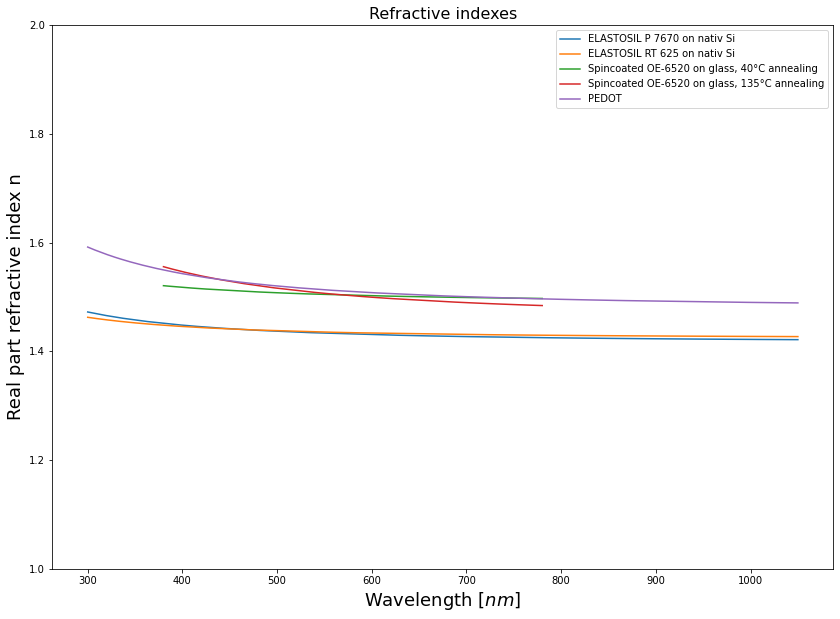

In [7]:
# Material data
nkH = pd.read_csv(data_path / "ELASTOSIL P 7670_nDecane_1zu10_Bladecoting_135C_Speed4mmPerSec_Nr161_nk_OK.csv",
                  sep='\s+', decimal=",").values

nkL = pd.read_csv(data_path / "ELASTOSIL RT 625_nDecane_1zu10_Bladecoting_135C_Speed4mmPerSec_Nr161_nk_OK.csv",
                  sep='\s+', decimal=",").values

nkP_Si = pd.read_csv(data_path / "ELASTOSIL P 7670_nDecane_1zu10_Bladecoting_135C_Speed8mmPerSec__onSi_Nr175_nk_OK.csv",
                  sep='\s+', decimal=",").values

nkRT_Si= pd.read_csv(data_path / "ELASTOSIL RT 625_nDecane_1zu10_Bladecoting_135C_Speed8mmPerSec__onSi_Nr176_nk_OK.csv",
                  sep='\s+', decimal=",").values

nkP_Si_native = pd.read_csv(data_path / "ELASTOSIL P 7670_nDecane_1zu10_Bladecoting_135C_Speed8mmPerSec__onSi_native_Nr181_nk_OK.csv",
                  sep='\s+', decimal=",").values

nkRT_Si_native = pd.read_csv(data_path / "ELASTOSIL RT 625_nDecane_1zu10_Bladecoting_135C_Speed8mmPerSec__onSi_native_Nr180_nk.csv",
                  sep='\s+', decimal=",").values

nkOE_135 = pd.read_csv(data_path / "glass_OE6520_Spinncoated_135C_Nr320.csv",
                  sep='\s+', decimal=",").values

nkOE = pd.read_csv(data_path / "glass_OE6520_Spinncoated_Nr314.csv",
                  sep='\s+', decimal=",").values

nkPEDOT = pd.read_csv(data_path / "PEDOT_FHC_SOLAR_NR45_nk.csv", sep='\s+', decimal=",").values

#nkPEDOT = np.loadtxt("Ellipso_PET_ITO_PEDOT(Inkjet)6_mitIm_nk.txt", comments=";")


shape = nkPEDOT.shape[0]



plt.figure(figsize=(14,10))
#plt.plot(nkH[:,0],nkH[:,1], label="nH")
#plt.plot(nkL[:,0],nkL[:,1], label="nL")
#plt.plot(nkH_Si[:,0],nkH_Si[:,1], label="n1_Si")
#plt.plot(nkL_Si[:,0],nkL_Si[:,1], label="n2_Si")
plt.plot(nkP_Si_native[:,0],nkP_Si_native[:,1], label="ELASTOSIL P 7670 on nativ Si")
plt.plot(nkRT_Si_native[:,0],nkRT_Si_native[:,1], label="ELASTOSIL RT 625 on nativ Si")
plt.plot(nkOE[:,0],nkOE[:,1], label="Spincoated OE-6520 on glass, 40°C annealing")
plt.plot(nkOE_135[:,0],nkOE_135[:,1], label="Spincoated OE-6520 on glass, 135°C annealing")
plt.plot(nkPEDOT[:,0],nkPEDOT[:,1], label="PEDOT")
#plt.xlim(350,800)
#plt.ylim(1.3,1.53)

plt.xlabel('Wavelength [$nm$]', size=18)
plt.ylabel('Real part refractive index n', size=18)
plt.title('Refractive indexes', size=16)
#plt.xlim(380,780)
plt.ylim(1,2)
plt.legend(loc="best")
#plt.savefig(plots_path / "Refractive indices" + ".svg", format="svg")
plt.show()

In [8]:
def cauchy(l, n0, n1, n2=0, k0=0, k1=0, k2=0):
    '''
    Cauchy model for non-absorbing layers
    '''
    C0 = 1e2
    C1= 1e7
    
    return n0 + C0*n1/l**2 + C1*n2/l**4 + (k0 + C0*k1/l**2 + C1*k2/l**4)*1j
    

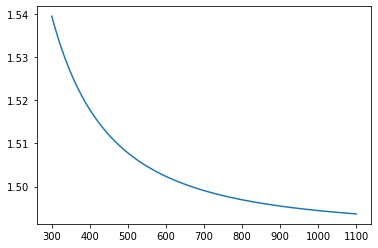

In [9]:
l = np.linspace(300,1100,2000)
nkOE_extrapolated = cauchy(l, 1.49, 44.5) # n0 & n1 values from mesurement in range 400-800 nm
#nkPEDOT_ex = cauchy(l, 0.961, 1057.6)
nkPDMS = cauchy(l, 1.401, 52.6)


plt.plot(l, nkOE_extrapolated.real, label="Spincoated OE-6520 on glass, 40°C annealing")
#plt.plot(l, nkPEDOT_ex.real, label="Spincoated PEDOT on glass, not annealing")
plt.show()

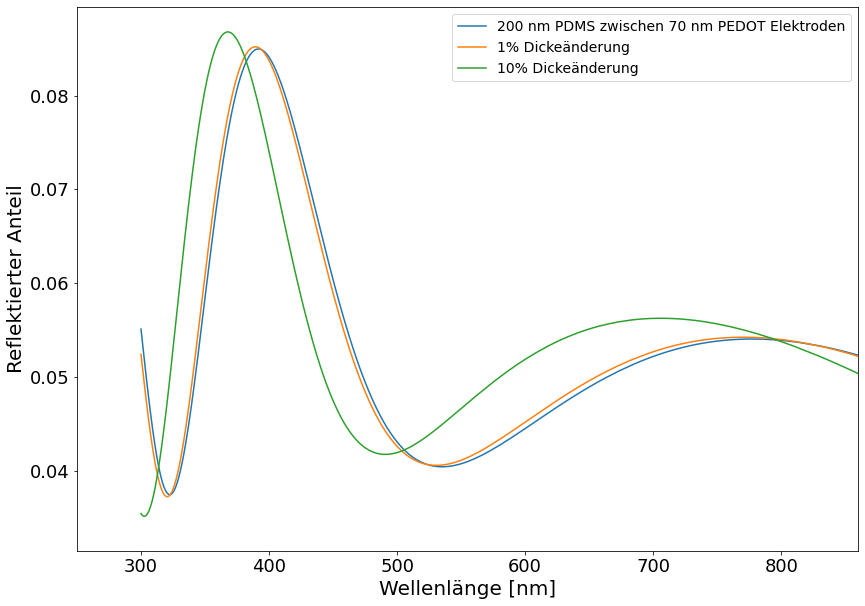

array([ inf,  70., 200.,  70.,  inf])

In [10]:
dL = 200 #600 / 4 /n_siliconeL # nm
d_PEDOT_PSS = 70 # nm

strain = 0.01
strain3 = 0.1
dL2 = dL - dL*strain
dL3 = dL - dL*strain3

# Stack
n_list = np.zeros((len(l), 3+2), dtype="complex128")
d_list = np.zeros(3+2)
d_list2 = np.zeros(3+2)
d_list3 = np.zeros(3+2)

# First medium is air
n_list[:,0] = np.full((len(l)), 1, dtype="complex128")
d_list[0] = np.inf
d_list2[0] = np.inf
d_list3[0] = np.inf

# Stack
n_list[:,1] = nkPEDOT[:,1]
n_list[:,2] = nkPDMS
n_list[:,3] = nkPEDOT[:,1]

d_list[1] = d_PEDOT_PSS
d_list[2] = dL
d_list[3] = d_PEDOT_PSS

d_list2[1] = d_PEDOT_PSS
d_list2[2] = dL2
d_list2[3] = d_PEDOT_PSS

d_list3[1] = d_PEDOT_PSS
d_list3[2] = dL3
d_list3[3] = d_PEDOT_PSS
    
# Substrate medium is glass
n_list[:,-1] = np.full((len(l)), 1.52, dtype="complex128")
d_list[-1] = np.array([np.inf])
d_list2[-1] = np.array([np.inf])
d_list3[-1] = np.array([np.inf])
    
    
# Calculate Reflectance for unpolarized light with tmm module
# Angle of reflectance th
th0 = 0
th1 = 45

# initialize lists of y-values to plot
R0 = []
R2 =[]
R3 =[]
for i in range(len(l)):
    # I arbitrarily decided to use 's'.
    R0.append(unpolarized_RT(n_list[i], d_list, th0*degree, l[i])['R'])
    R2.append(unpolarized_RT(n_list[i], d_list2, th0*degree, l[i])['R'])
    R3.append(unpolarized_RT(n_list[i], d_list3, th0*degree, l[i])['R'])

R0 = np.array(R0)
R2 = np.array(R2)
R3 = np.array(R3)

# Plot
plt.figure(figsize=(14,10))
plt.plot(l, R0, label = "200 nm PDMS zwischen 70 nm PEDOT Elektroden")
plt.plot(l, R2, label = "1% Dickeänderung")
plt.plot(l, R3, label = "10% Dickeänderung")
#plt.plot(nkPEDOT[:,0],R1, label = "45° incidence")
#plt.xlabel('Wavelength [$nm$]')
#plt.ylabel('Fraction reflected')
#plt.title('Reflection of unpolarized light')
#plt.legend(loc="best")
plt.xlim(250, 860)
#plt.ylim(0.01, 0.09)

plt.xlabel("Wellenlänge [nm]", size=20)
plt.ylabel("Reflektierter Anteil", size=20)
#plt.title('Reflection of unpolarized light', size=22)

plt.legend(loc="best", fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig(plots_path / "ThinFilmInt_PEDOT70nmPDMS200nmPEDOT70nm2percStrain" + ".pdf", format="pdf", bbox_inches="tight")



plt.show()

d_list

Number of layers: 14


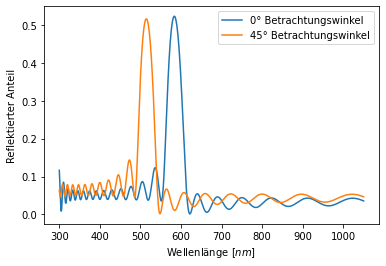

array([ inf,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70.,
       100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,
        70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,
        30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  inf])

In [12]:
# Number of repetition in
n = 14

dH = 70 #600 / 4 /n_siliconeH  # nm
dL = 100 #600 / 4 /n_siliconeL # nm
d_PEDOT_PSS = 30 # nm


nkH = pd.read_csv(data_path / "glass_OE6520_Spinncoated_135C_Nr320.csv",
                  sep='\s+', decimal=",").values

nkL = pd.read_csv(data_path / "ELASTOSIL P 7670_nDecane_1zu10_Bladecoting_135C_Speed8mmPerSec__onSi_native_Nr181_nk_OK.csv",
                  sep='\s+', decimal=",").values

# Unitcell
n_unit = np.zeros((shape, 3), dtype="complex128")
n_unit[:,0] = nkH[:,1]
n_unit[:,1] = nkL[:,1]
n_unit[:,2] = nkPEDOT[:,1] + nkPEDOT[:,2]*1j

d_unit = np.array([dH, dL, d_PEDOT_PSS])

# Stack
n_list = np.zeros((shape, 3*n + 2), dtype="complex128")
d_list = np.zeros(3*n + 2)

# First medium is air
n_list[:,0] = np.full((shape), 1, dtype="complex128")
d_list[0] = np.inf


# Periodic layers (between air and substrate)
for i in range(1, 3*n, 3):
    n_list[:,i:i+3] = n_unit
    d_list[i:i+3] = d_unit
    
# Substrate medium is glass
n_list[:,-1] = np.full((shape), 1.52, dtype="complex128")
d_list[-1] = np.array([np.inf])    
    
# Calculate Reflectance for unpolarized light with tmm module
# Angle of reflectance th
th0 = 0
th1 = 45

# initialize lists of y-values to plot
R0 = []
R1 =[]
for i in range(shape):
    # I arbitrarily decided to use 's'.
    R0.append(unpolarized_RT(n_list[i], d_list, th0*degree, nkPEDOT[i,0])['R'])
    R1.append(unpolarized_RT(n_list[i], d_list, th1*degree, nkPEDOT[i,0])['R'])

R0 = np.array(R0)
R1 = np.array(R1)

# Plot
print("Number of layers: " + str(n))
plt.figure()
plt.plot(nkPEDOT[:,0],R0, label = "0° Betrachtungswinkel")
plt.plot(nkPEDOT[:,0],R1, label = "45° Betrachtungswinkel")
plt.xlabel('Wellenlänge [$nm$]')
plt.ylabel('Reflektierter Anteil')
#plt.title('Reflection of unpolarized light')
plt.legend(loc="best")
plt.savefig(plots_path / "Reflection of unpolarized light at different incidence_14doubleLayers_materialData" + ".pdf", format="pdf")
plt.show()

d_list

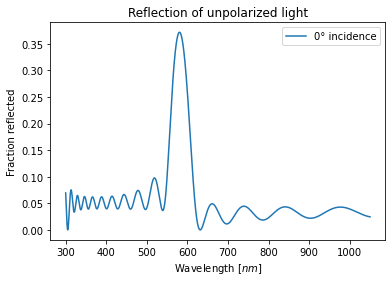

In [13]:
# 3D-Plot Reflection - Wavelength - Thickness strain ( x [%] * (a,b))

def reflection(N, th, *material, substrate=1.52):
    '''
    Calculates the reflection for a multilayer stack. The order of the material
    is from bottom to top
    
    -------
    N - Repetition of the unit cell
    th - angle of reflection
    substrate - 1.52 in case of glass
    material - (thickness, nk)
    
    '''
    shape = len(material[0][1])
    l = len(material)
    
    # Unitcell
    n_unit = np.zeros((shape, l), dtype="complex128")
    d_unit = np.zeros(l)
    for i in range(l):
        n_unit[:,i] = material[i][1][:,1]
        d_unit[i] = material[i][0]

    # Stack
    n_list = np.zeros((shape, l*N + 2), dtype="complex128")
    d_list = np.zeros(l*N + 2)

    # First medium is air
    n_list[:,0] = np.full((shape), 1, dtype="complex128")
    d_list[0] = np.inf


    # Periodic layers (between air and substrate)
    for i in range(1, l*N, l):
        n_list[:,i:i+l] = n_unit
        d_list[i:i+l] = d_unit

    # Substrate medium is glass
    n_list[:,-1] = np.full((shape), 1.52, dtype="complex128")
    d_list[-1] = np.array([np.inf])    
    
    # initialize lists of y-values to plot
    R = []
    for i in range(shape):
        # I arbitrarily decided to use 's'.
        R.append(unpolarized_RT(n_list[i], d_list, th*degree, nkPEDOT[i,0])['R'])

    return np.array(R)

spec1 = reflection(10, 0, (70,nkH), (100,nkL), (30, nkPEDOT))

plt.figure()
plt.plot(nkPEDOT[:,0],spec1, label = "0° incidence")
plt.xlabel('Wavelength [$nm$]')
plt.ylabel('Fraction reflected')
plt.title('Reflection of unpolarized light')
plt.legend(loc="best")
plt.savefig(plots_path / "Reflection of unpolarized light at different incidence_6doubleLayers_materialData" + ".svg", format="svg")
plt.show()

In [14]:
# Calculate reflection for various thicknesses (this takes a while...)
spec = np.zeros((601,shape))

for i in range(600,0,-1): # nkL thickness from 0 to 600 nm
    a = i *2
    spec[i] = reflection(14, 0, (a/2, nkH), (a/2, nkL))
    print(str(i), end="\t")

600	599	598	597	596	595	594	593	592	591	590	589	588	587	586	585	584	583	582	581	580	579	578	577	576	575	574	573	572	571	570	569	568	567	566	565	564	563	562	561	560	559	558	557	556	555	554	553	552	551	550	549	548	547	546	545	544	543	542	541	540	539	538	537	536	535	534	533	532	531	530	529	528	527	526	525	524	523	522	521	520	519	518	517	516	515	514	513	512	511	510	509	508	507	506	505	504	503	502	501	500	499	498	497	496	495	494	493	492	491	490	489	488	487	486	485	484	483	482	481	480	479	478	477	476	475	474	473	472	471	470	469	468	467	466	465	464	463	462	461	460	459	458	457	456	455	454	453	452	451	450	449	448	447	446	445	444	443	442	441	440	439	438	437	436	435	434	433	432	431	430	429	428	427	426	425	424	423	422	421	420	419	418	417	416	415	414	413	412	411	410	409	408	407	406	405	404	403	402	401	400	399	398	397	396	395	394	393	392	391	390	389	388	387	386	385	384	383	382	381	380	379	378	377	376	375	374	373	372	371	370	369	368	367	366	365	364	363	362	361	360	359	358	357	356	355	354	353	352	351	

In [ ]:
# !!!! save ? load ?

#np.save(calc_path / "ReflectionForDifferentThicknesses_14Layers_OnlyBragg", spec)
spec = np.load("ReflectionForDifferentThicknesses_14Layers.npy")

In [18]:
spec.shape

(601, 2000)

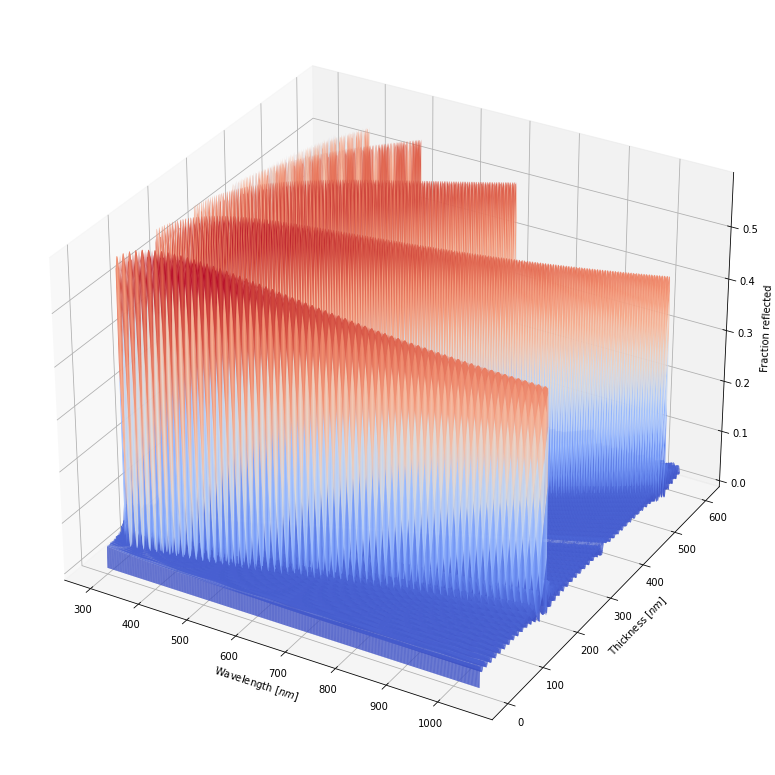

In [19]:
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(nkPEDOT[:,0],np.linspace(0,601,601))
ax.plot_surface(X, Y, spec, cmap="coolwarm", rcount=600, ccount=600)

ax.set_xlabel('Wavelength [$nm$]')
ax.set_ylabel('Thickness [$nm$]')
ax.set_zlabel('Fraction reflected')

plt.show()

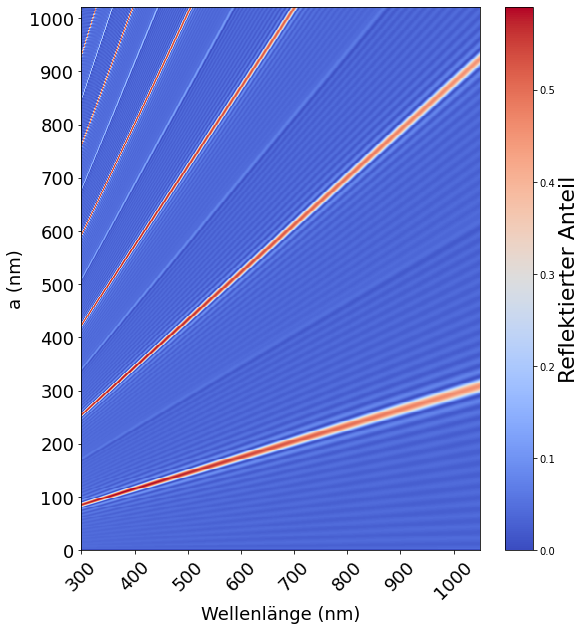

In [20]:
# Plot data as image
plt.figure(figsize=(9,10))
plt.imshow(spec, origin='lower',cmap = "coolwarm",interpolation='none',  extent=(300, 1050, 0, 1022))
plt.xlabel('Wellenlänge (nm)', fontsize=18)
plt.ylabel('a (nm)', fontsize=18)
plt.xticks(fontsize=18, rotation=45)
plt.yticks(np.arange(0,1023, 100), fontsize=18)
#plt.xlim(380,780)

cb = plt.colorbar()
cb.set_label('Reflektierter Anteil',fontsize=22)
#plt.savefig(plots_path / "ThicknessDependentReflection_Braggmirror_14DoubleLayers"+ ".pdf", format="pdf")
plt.show()

Number of layers: 100


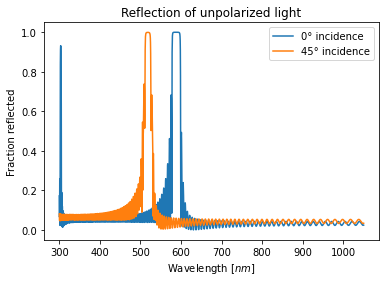

array([ inf,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70.,
       100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,
        70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,
        30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70.,
       100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,
        70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,
        30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70.,
       100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,
        70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,
        30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70.,
       100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,
        70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,
        30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70.,
       100.,  30.,  70., 100.,  30.,  70., 100.,  3

In [22]:
# Number of repetition in
n = 100

# Unitcell
n_unit = np.zeros((shape, 3), dtype="complex128")
n_unit[:,0] = nkH[:,1]
n_unit[:,1] = nkL[:,1] 
n_unit[:,2] = nkPEDOT[:,1] + nkPEDOT[:,2]*1j

d_unit = np.array([dH, dL, d_PEDOT_PSS])

# Stack
n_list = np.zeros((shape, 3*n + 2), dtype="complex128")
d_list = np.zeros(3*n + 2)

# First medium is air
n_list[:,0] = np.full((shape), 1, dtype="complex128")
d_list[0] = np.inf

# Substrate medium is glass
n_list[:,-1] = np.full((shape), 1.52, dtype="complex128")
d_list[-1] = np.array([np.inf])

# Periodic layers (between air and substrate)
for i in range(1, 3*n, 3):
    n_list[:,i:i+3] = n_unit
    d_list[i:i+3] = d_unit
    
    
# Calculate Reflectance for unpolarized light with tmm module
# Angle of reflectance th
th0 = 0
th1 = 45

# initialize lists of y-values to plot
R0 = []
R1 =[]
for i in range(shape):
    # I arbitrarily decided to use 's'.
    R0.append(unpolarized_RT(n_list[i], d_list, th0*degree, nkPEDOT[i,0])['R'])
    R1.append(unpolarized_RT(n_list[i], d_list, th1*degree, nkPEDOT[i,0])['R'])

R0 = np.array(R0)
R1 = np.array(R1)

# Plot
print("Number of layers: " + str(n))
plt.figure()
plt.plot(nkPEDOT[:,0],R0, label = "0° incidence")
plt.plot(nkPEDOT[:,0],R1, label = "45° incidence")
plt.xlabel('Wavelength [$nm$]')
plt.ylabel('Fraction reflected')
plt.title('Reflection of unpolarized light')
plt.legend(loc="best")
#plt.savefig(plots_path / "Reflection of unpolarized light at different incidence_6doubleLayers_materialData.svg", format="svg")
plt.show()

d_list

Number of layers: 100


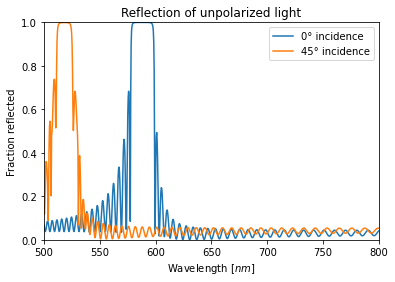

array([ inf,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70.,
       100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,
        70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,
        30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70.,
       100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,
        70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,
        30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70.,
       100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,
        70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,
        30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70.,
       100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,
        70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,
        30.,  70., 100.,  30.,  70., 100.,  30.,  70., 100.,  30.,  70.,
       100.,  30.,  70., 100.,  30.,  70., 100.,  3

In [23]:
# Plot
print("Number of layers: " + str(n))
plt.figure()
plt.plot(nkPEDOT[:,0],R0, label = "0° incidence")
plt.plot(nkPEDOT[:,0],R1, label = "45° incidence")
plt.xlabel('Wavelength [$nm$]')
plt.ylabel('Fraction reflected')
plt.title('Reflection of unpolarized light')
plt.legend(loc="best")
plt.xlim(500,800)
plt.ylim(0,1)
#plt.savefig(plots_path / "Reflection of unpolarized light at different incidence_6doubleLayers_materialData.svg", format="svg")
plt.show()

d_list